# Balance the PELIC Dataset
This notebook is to balance the augmented PELIC dataset.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/PELIC_augmented.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31948 entries, 0 to 31947
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   answer_id         31948 non-null  int64  
 1   question_id       31948 non-null  int64  
 2   anon_id           31948 non-null  object 
 3   course_id         31948 non-null  int64  
 4   created_date      31948 non-null  object 
 5   text_len          31948 non-null  int64  
 6   answer            31931 non-null  object 
 7   tokens            31948 non-null  object 
 8   tok_lem_POS       31948 non-null  object 
 9   question_type_id  31948 non-null  float64
 10  question          31948 non-null  object 
 11  allow_text        31948 non-null  float64
 12  gender            31948 non-null  object 
 13  L1                31948 non-null  object 
 14  class_id          31948 non-null  object 
 15  level             31948 non-null  int64  
 16  question_type     31948 non-null  object

In [4]:
# Look at the level distribution for the non-augmented data
df[df.is_augmented == 0].level.value_counts()

level
4    12163
5    10094
3     7993
2      849
Name: count, dtype: int64

In [5]:
# Look at the level distribution for the augmented data
df[df.is_augmented == 1].level.value_counts()

level
2    849
Name: count, dtype: int64

In [6]:
# Look at the level distribution of all the data
df.level.value_counts()

level
4    12163
5    10094
3     7993
2     1698
Name: count, dtype: int64

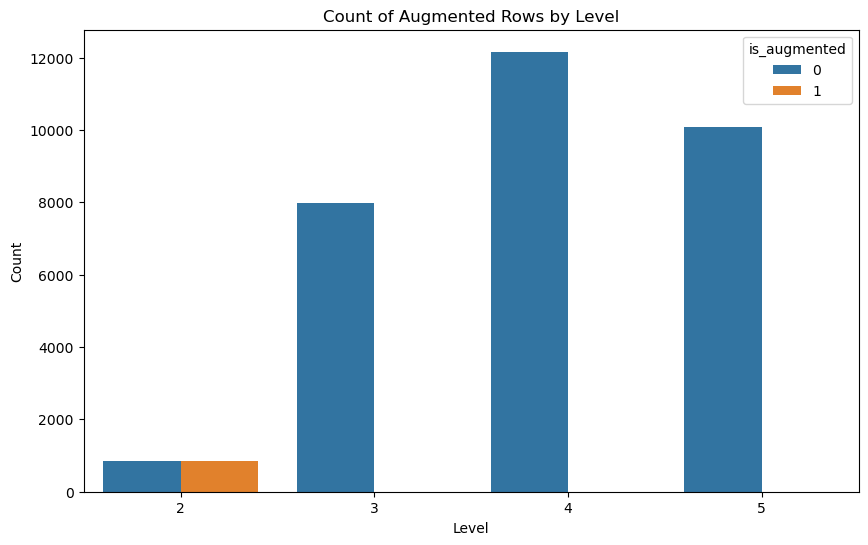

In [7]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='level', hue='is_augmented')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Augmented Rows by Level')

# Display the plot
plt.show()

In [8]:
# Divide the df by levels and order them by the longest answers
level_2 = df[df.level == 2].copy()

level_3 = df[df.level == 3].copy()
level_3['length'] = level_3['answer'].apply(len)
level_3_sorted = level_3.sort_values(by='length', ascending=False)

level_4 = df[df.level == 4].copy()
level_4['length'] = level_4['answer'].apply(len)
level_4_sorted = level_4.sort_values(by='length', ascending=False)

level_5 = df[df.level == 5].copy()
level_5['length'] = level_5['answer'].apply(len)
level_5_sorted = level_5.sort_values(by='length', ascending=False)

In [9]:
# Define a function to conserve answer length and question variability
def select_unique_rows(df, num_answers):
    '''
    Iterates through the questions in the dataframe
    and appends the row to a new dataframe,
    only if the question is not already in the new dataframe.
    If necessary, allows for repeats by selecting the longest answers.
    '''
    # Create an empty list to store unique rows
    unique_rows = []

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        # Check if the question is already in unique_df
        if row['question'] not in [r['question'] for r in unique_rows]:
            # Append the row to unique_rows
            unique_rows.append(row)
            # Check if unique_df has reached the desired length
            if len(unique_rows) == num_answers:
                break

    # If the desired number of answers has not been reached,
    # allow repeats by selecting the longest answers
    while len(unique_rows) < num_answers:
        longest_answer_row = df.loc[df['answer'].apply(len).idxmax()]
        unique_rows.append(longest_answer_row)
    
    # Convert the list of DataFrames to a DataFrame
    unique_df = pd.DataFrame(unique_rows)
    
    return unique_df

In [10]:
# Apply the function to each level
level_3_selected = select_unique_rows(level_3_sorted, 1698)
level_4_selected = select_unique_rows(level_4_sorted, 1698)
level_5_selected = select_unique_rows(level_5_sorted, 1698)

In [11]:
# Merge all of the dataframes and reset the index
merged_df = pd.concat([level_2, level_3_selected, level_4_selected, level_5_selected]).reset_index(drop=True)
# Drop the length column that had been added only for the purpose of the function
merged_df = merged_df.drop(['length'],axis=1)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6792 entries, 0 to 6791
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   answer_id         6792 non-null   int64  
 1   question_id       6792 non-null   int64  
 2   anon_id           6792 non-null   object 
 3   course_id         6792 non-null   int64  
 4   created_date      6792 non-null   object 
 5   text_len          6792 non-null   int64  
 6   answer            6775 non-null   object 
 7   tokens            6792 non-null   object 
 8   tok_lem_POS       6792 non-null   object 
 9   question_type_id  6792 non-null   float64
 10  question          6792 non-null   object 
 11  allow_text        6792 non-null   float64
 12  gender            6792 non-null   object 
 13  L1                6792 non-null   object 
 14  class_id          6792 non-null   object 
 15  level             6792 non-null   int64  
 16  question_type     6792 non-null   object 


In [13]:
# Look at the level distribution after the data selection
merged_df.level.value_counts()

level
2    1698
3    1698
4    1698
5    1698
Name: count, dtype: int64

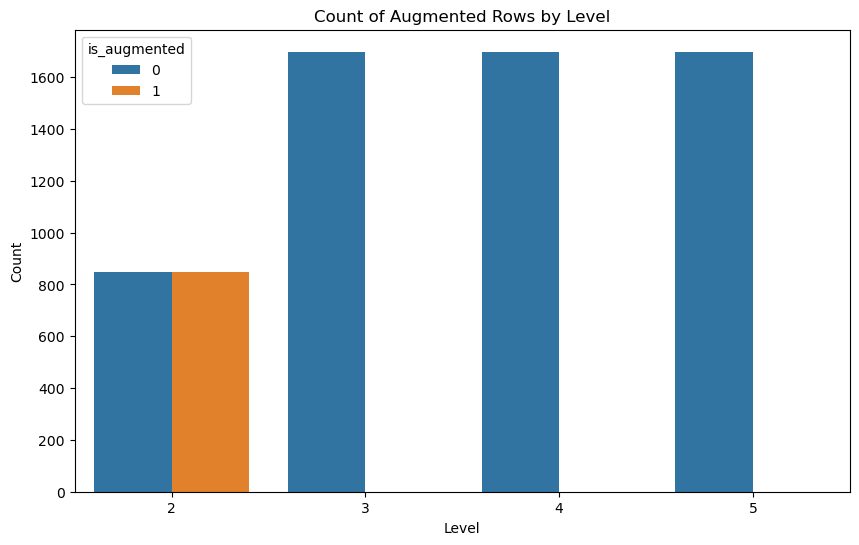

In [14]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='level', hue='is_augmented')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Augmented Rows by Level')

# Display the plot
plt.show()

In [15]:
merged_df.to_csv('../data/PELIC_balanced.csv')